<h3>1.what to setup and install</h3>

In [ ]:
!pip install tensorflow  install matplotlib opencv-python

In [ ]:
!pip list

In [6]:
import tensorflow as tf

In [7]:
import os

#show all the files in the folder and format

In [8]:
os.listdir('lib')

['.DS_Store', 'python3.11']

In [9]:
os.path.join('Data','Happy people')

'Data/Happy people'

In [10]:
# Avoid OOM error By Gpu meomory consumtion 

In [11]:
gpus=tf.config.experimental.list_physical_devices('GPU')

In [12]:
gpus

[]

In [13]:

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)



<h2>2.Remove Dodgy Images</h2>


import the two lib one to computer vision other for extention , matplot to visualize 

In [14]:
import cv2


In [15]:
from matplotlib import pyplot as plt

In [112]:
import imghdr

Hold the data in a variable 

In [116]:
data_dir='data'

In [117]:
os.listdir('data')


['.DS_Store', 'Sad people', '.ipynb_checkpoints', 'Happy people']

Extentions that we need

In [124]:
image_exts=['jpeg','jpg','bmb','png']

<h5>Optional line too if you want to see specific image</h5>

In [125]:
img=cv2.imread(os.path.join('data','Happy people','960x0.jpg'))
img.shape

(640, 960, 3)

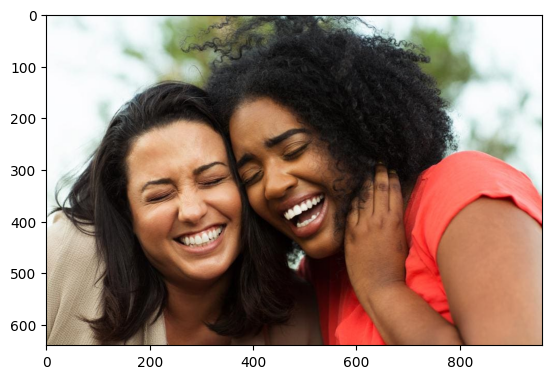

In [126]:
#Without  color plt.imshow(img)
#IN COLOR
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

Two loops one on the data file second on happy and sad file (Images or sub directory) :  data then happy  then data then sad

to encounter the error of the hidden file we can name the class of happy and sad folder

In [ ]:

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        # Loop through the images in the current folder
        for image_file in os.listdir(folder_path):
            # Construct the full path to the image file
            image_path = os.path.join(folder_path, image_file)

            # Check if the item is a file and has a valid image extension
            if os.path.isfile(image_path) and image_file.split('.')[-1].lower() in image_exts:
                try:
                    # Read the image using OpenCV
                    image = cv2.imread(image_path)

                    # Check if the image type is valid using imghdr
                    image_type = imghdr.what(image_path)

                    # Check if the image type is in the allowed list
                    if image_type in  image_exts:
                        print("Valid image: {}".format(image_path))
                    else:
                        print("Not a valid image: {}".format(image_path))
                        # Optionally, remove the image file
                        os.remove(image_path)
                except Exception as e:
                    print("Error processing image: {}".format(image_path))
                    print(e)
            else:
                print("Not a valid image: {}".format(image_path))
                #  counter d.s()Remove the file if it's not a valid image and it's not a directory
                if os.path.isfile(image_path):
                    try:
                        os.remove(image_path)
                    except PermissionError:
                        print("Permission denied: {}".format(image_path))
                else:
                    print("Skipping directory: {}".format(image_path))


<h3>3.Load the Data </h3>

In [ ]:
tf.data.Dataset??

In [31]:
#provide selection for multi-dimenstion array
import numpy as np

In [32]:
#acess keras to bulid the pipline
tf.keras.utils.image_dataset_from_directory('data')
# you can ADUST YOUR DATA 
#tf.keras.utils.image_dataset_from_directory('data',batch_size=8)
data = tf.keras.utils.image_dataset_from_directory('data')
#(Two classes for two folders)


Found 259 files belonging to 2 classes.
Found 259 files belonging to 2 classes.


In [ ]:
#what is inside

data=tf.keras.utils.image_dataset_from_directory??
#each batch have  32 image (size)


In [ ]:
# we cant do this data[0] because it is from genreator not from pre

In [33]:
#we  convert it to arry  and loop through it
data_iterator=data.as_numpy_iterator()


In [ ]:
# batch sample
# will grab one after other len(batch) 2 is the lenght one images and lebel
batch=data_iterator.next()


In [ ]:
batch[1]   #batch have images and lapel
#Images in key zero batch[0]
#labels in key 1 batch[1]

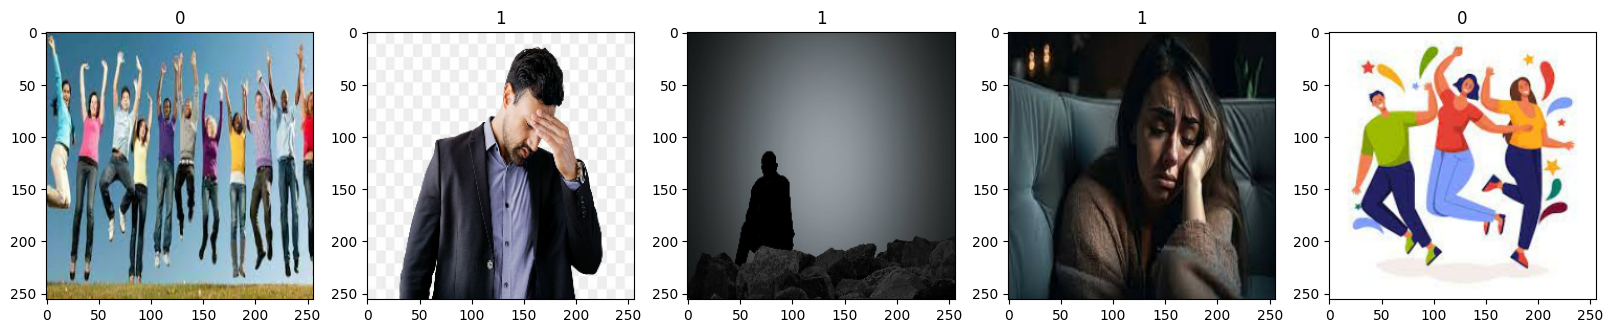

In [25]:

# to know which class to which image
# use matplot to show 4 images  and show their title
#subplots create 4 images and size is 20*20 (multiple plots) 
fig,ax = plt.subplots(ncols=5,figsize=(20,20))
#the loop over the image with respect to idx
for idx ,img in enumerate(batch[0][:5]):   # zero because images
    #this will show the image and convert it from it if not ready
    ax[idx].imshow(img.astype(int))
#print the class number   title of each one  
    ax[idx].title.set_text(batch[1][idx])  # one because titles
    #class one sad people , zero happy

In [26]:
# some comments with batch
batch[0].shape  #32 images , of  shape 256 and 256 ,3num ofcolor channels means (colored)
scale=batch[0]/255
scale.max()   #we try to make this values as less as possible 
                 #0 min to 255 max   tensor flow make it 255
                 #divide by 255 
                 #use the advantage of datapipline cabability  
                 #which got to preprocess data

1.0

<h3>4. Preprocess Data </h3>
<h5>1.scale the data </h5>

In [27]:
#What map() do map(function, on iterable) apply function on iterable

In [35]:
data=data.map(lambda x,y:(x/255,y))
#lambda small identification
# x represent images in the batch , y target 
#lambda x,y:   as we load batch
#tensorflow data api
#to know the functions
#zip is important too combine


In [ ]:
#data.as_numpy_iterator().next()
#to grab the first set for example
data.as_numpy_iterator().next()[0]

In [ ]:
scaled_iterator=data.as_numpy_iterator()
batch=scaled_iterator.next()

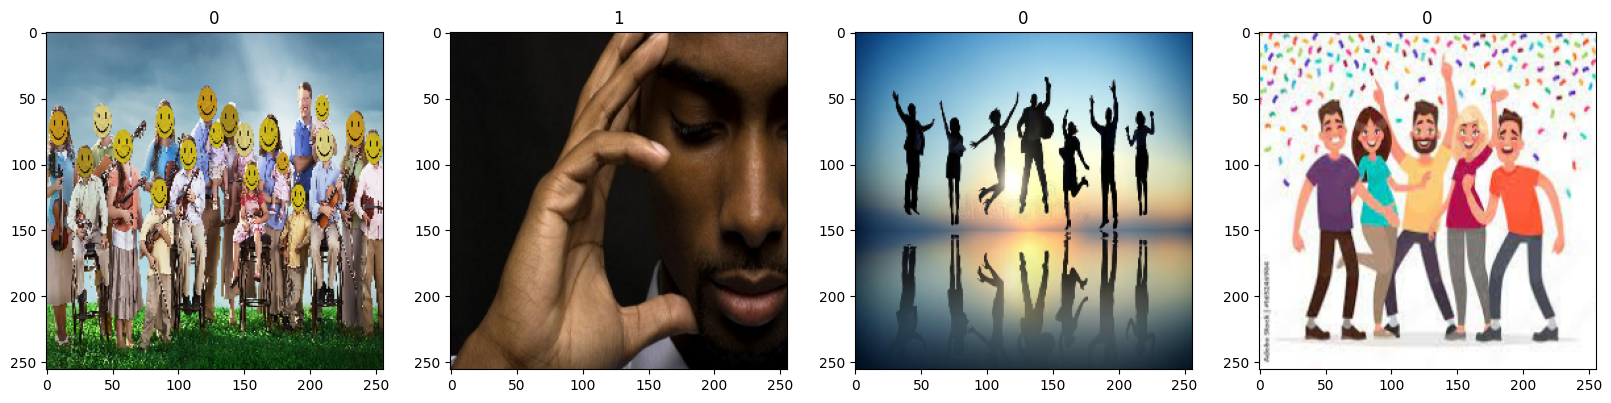

In [38]:
#between 0 and 1  bec of the preprocessing
# to know which class to which image
# use matplot to show 4 images  and show their title
#subplots create 4 images and size is 20*20 (multiple plots) 
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
#the loop over the image with respect to idx
for idx ,img in enumerate(batch[0][:4]):   # zero because images
    #this will show the image and convert it from it if not ready
    ax[idx].imshow(img)  # not
#print the class number   title of each one  
    ax[idx].title.set_text(batch[1][idx])  # one because titles
    #class one sad people , zero happy

<h4>4.2 split data To Traning and testing part </h4>

In [39]:
len(data) # 9 batches each one ha?ve 32 images

9

In [40]:
train_size= int(len(data)*.7)   #(during training) training deep learning model 
val_size=int (len(data)*0.2)+1  #(during training) we use it to find how we build the deep learning model # evaluate our model while training
test_size=int(len(data)*0.1)+1  # (post training for evaluation)model not seen until end final 
#6 for train 2 for validation 1 for tedst
#take and test is in the Tf LIB
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)


<h3>5.1 Buliding Deep learning Model </h3> 

In [41]:
# (quick and easy)(api)Sequential is good for one data input and one output 
# another type of api (functional API)(multiple input and output,connection you can do fancy staff with DLM ,)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

#Dense fully connected layer  , Flatten: allow us to go from convlution layer and reduce it to a layer which dense will able to taketake
# regulization (less important )

In [42]:
#or -model=sequential([conv2d(), ])
model=Sequential()



In [43]:
#Add  hidden layers and pooling them 
#Architecture decision on how it will be desgined
#Conv2D(Filters ,Size of filter() , 1 How it will move Eg 1 pixel, Activation,input(pixels heigh,pixels wide, channels)  )
#It Depend on parameters how the model will perform like
#Activiation means how is the function be like relu mean  any value below zero will be zero
#If NN is linear in nature not necessery to mention 
model.add(Conv2D(16,(3,3), 1, activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3),1,activation='relu'))
#32 filters to dive more complex more accurate 
model.add(MaxPooling2D())
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
#sigmoid take anyouput and convert it to 0,1 happy , sad class

/Users/mohamedamr/Documents/DeepLearningProjects/CNN/myenv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [44]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [45]:
model.summary()
#The dec from 256 to 254 can be adjusted only bec 1 pixel height and one width
#params = (kernel_height * kernel_width * input_channels + 1) * output_channels
#flatten   becauese 30*30*16 last layer (None, 14400 all of the lements to a single dimentstion

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

<h3>5.2 Train </h3> 

In [46]:
#we have file log assigen a variable to it
logdir='Logs'

In [47]:
#create callback for 1.save your model 2. check at particular point 3.specific login 
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)
#we can see from the callback how or model perform or bvary at particular time


<h5>* IMPORTAT MODEL.fit &MODEL.predict <h/5>

#loss sould go down accuarcy go up, val_loss 

In [ ]:
#fit is the training components
#predict is when he predict
#*remember was 6 data in train 
#*epochs how long 1epoch mean 1 run over entire set of data 
hist=model.fit(train,epochs=10,validation_data=val, callbacks=[tensorboard_callback])
                                                #After train the data, we will run evalution on validationdata
                        # low number of epochs, the model may not have enough iterations to converge  optimal solution.               


<h3>5.3 plot Performance</h3>

In [ ]:
his.history
#bring the loss information and acuracy info

In [ ]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='violet',label='loss')
plt.plot(hist.history['val_loss'],color='green',label='val_loss')
fig.suptitle('loss', fontsize=20)
plt.legend(loc="upper right")
plt.show
#if it is up like spike while decreasing at some point mean the overfitting
# need to apply regulazation or some data (loss)  mean not able to learn at this particular data
#varience problem
#visualize on anything we want    in the history 


In [ ]:
#visualize on anything we want    in the history 
plt.plot(hist.history['accuracy'],color='blue',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show

<h3> 6. Evaluate Performance</h3>


In [ ]:
<h3>6.1 Evaluate </h3> 

In [56]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
#for classification problem we use (Recall,precsision,BinaryAccuracy)

In [57]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()


In [ ]:

for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

In [62]:
print(f' Prediction: {pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}' )
#high precision means perform better
#high values means better vbetween 0 and 1

 Prediction: 1.0,Recall:1.0,Accuracy:1.0


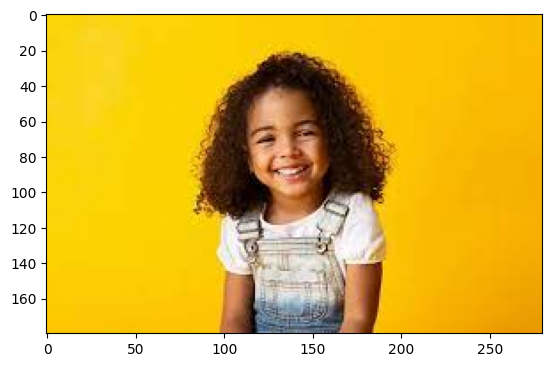

In [82]:
import cv2
img=cv2.imread('test1.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show() 

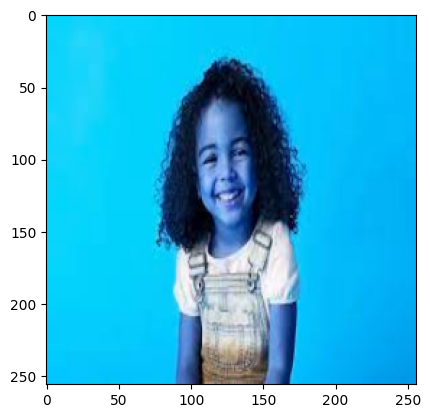

In [85]:
# when we passs the data through the NN  shoukld be in shape 256, 256
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [93]:
np.expand_dims(resize,0)
#put it in other list
resize.shape

TensorShape([256, 256, 3])

In [ ]:
#THE NN  exepect a batch of images so
#Incupsulated inside of sets or array

yhat=model.predict(np.expand_dims(resize/255,0))
 #we divide by 255 to scale it 

In [ ]:
 yhat

In [ ]:

#indicate happy or sad
if yhat>0.5:
    print(f' Predicted is sad') 
else: 
    print(f'Predicted is happy')


<h3> 7.Save </h3> 

In [103]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','Happysadmodel.h5'))
#sterlizatzazaion h5  reloaded using load

In [ ]:
new_model=load_model(os.path.join('models','happysadmodel.h5'))

In [ ]:
yhatnew=new_model.predict(np.expand_dims(resize/255,0))

In [ ]:
if yhatnew>0.5:
    print(f' Predicted is sad') 
else: 
    print(f'Predicted is happy')
